# **Caso Funnys Company**
Intregrantes de ***Hay un Jupyter Notebook que lo explica***:
- **Fabián Maldonado** 201973116-5
- **Nayely Pérez** 202173124-5
- **Franco Salgado** 202073058-k
- **Kevin Vega** 202073064-4

[Video ▶️](https://www.youtube.com/watch?v=cqN5V-k6wi4&feature=youtu.be)

[Colab](https://colab.research.google.com/drive/1d-HA554aGISOEbKAs8V31lWhwwvghq0g?usp=sharing)

[Github](https://github.com/maldonado-fabian/Estos-son-los-Jupyter-que-lo-explican/tree/main)


# **Introducción**

Funnys Company es una empresa dedicada a la producción de productos de entretención en el hogar, con ventas en diversas ciudades de Chile. Actualmente cuenta con una única planta de producción ubicada en Rancagua, desde la cual abastece a todos los puntos de venta del país.

La compañía ha experimentado un gran crecimiento de la demanda y, según proyecciones, este incremento continuará durante los próximos tres años en todas las regiones del país.
La capacidad de producción actual y la red de distribución no permiten abordar este crecimiento, lo que obliga a rediseñar la estrategia de producción y distribución.


Con el objetivo de suplir la demanda se han identificado cinco grandes ciudades como candidatas para contruir o no nuevas plantas de producción y se han identificado tres opciones de transporte, para realizar este técnico para la toma de decisiones de la empresa se nos ha entregado:
- La demanda actual y su tasa de crecimiento.
- Para cada una de las ciudades, sus costos fijos, variables y de apertura de nuevas plantas.
- Para cada una de las alternativas de transporte, el costo de transporte por unidad de producto de cada ciudad.

### Como alternativas de solución tenemos dos categorías
##### 1. Con respecto a la construcción de plantas en cada ciudad evaluada
- No instalar una planta.
- Instalar una planta pequeña.
- Instalar una planta grande.
##### 2. Con respecto a la elección de transporte
- Evaluar y seleccionar una de las alternativas de transporte propuestas.

### Propuesta de solución
Como equipo HuJNqlE proponemos en este informe una solución mediante un modelo de programación matemática que permita:
- Tomar la decisión de donde construir o no una nueva planta ya sea grande o pequeña.
- Tomar la decisión de cual de las alternativas de trasporte se debe elegir por ciudad.

Para lograr esto, el modelo apuntará a minimizar los costos operativos, supliendo la demanda total, sin superar la capacidad de producción de cada una de las plantas.

# **Metodología**



In [ ]:
# Instalar PuLP:
%%bash
python - << 'PY'
import importlib, sys
def ensure(module):
    try:
        importlib.import_module(module)
        print(f"OK: {module} ya está instalado")
    except ImportError:
        import subprocess
        print(f"Instalando {module}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', module])
        print(f"Instalado: {module}")
for m in ["pulp", "cartopy"]:
    ensure(m)
import pulp
print("Versión PuLP:", pulp.__version__)
print("Solvers disponibles:", pulp.listSolvers(onlyAvailable=True))
PY

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.7 MB/s eta 0:00:00
Instalando pulp...
Instalado: pulp
Instalando cartopy...
Instalado: cartopy
Versión PuLP: 3.0.2
Solvers disponibles: ['PULP_CBC_CMD', 'HiGHS']


In [ ]:
import pulp #importamos PuLP

# $1)$ Recopilación y representación de conjuntos
- **Plantas:** $P = \{\text{Pequeña}, \text{ Grande}\}$
- **Regiones:** $R = \{\text{R1}, \text{ R2}, \text{ R3}, \text{ R4}, \text{ R5}, \text{ R6}\}$
- **Ciudades:** $C = \{\text{Antofagasta}, \text{ Valaparaíso}, \text{ Santiago}, \text{ Rancagua}, \text{ Concepción}, \text{ Puerto Montt}\}$
- **Transportes:** $T = \{\text{AT1}, \text{ AT2}, \text{ AT3}\}$
- **Año:** $A = \{1, 2, 3\}$

In [ ]:
plantas     = ["Pequeña", "Grande"]
regiones    = ["R1", "R2", "R3", "R4", "R5", "R6"]
ciudades    = ["Antofagasta", "Valparaíso", "Santiago", "Rancagua", "Concepción", "Puerto Montt"]
transportes = ["AT1", "AT2", "AT3"]
años        = [1, 2, 3]

$2)$ Definición de parámetros:
-

# Demanda regional actual que enfrenta Funnys Company.
| Región | Demanda Actual<br>(Unidades de producto) | Tasa de Crecimiento |
| :----: | :--------------------------------------: | :-----------------: |
|   01   |                  951776                  |        0.16         |
|   02   |                  967364                  |        0.22         |
|   03   |                  512051                  |        0.26         |
|   04   |                  386248                  |        0.15         |
|   05   |                  946174                  |        0.39         |
|   06   |                  303445                  |        0.30         |

In [ ]:
demanda_regional  = {"R1": 951776, "R2": 967364, "R3": 512051, "R4": 386248, "R5": 946174, "R6": 303445}
tasas_crecimiento = {"R1": 0.16,   "R2": 0.22,   "R3": 0.26,   "R4": 0.15,   "R5": 0.39,   "R6": 0.30  }

# Capacidad de planta de producción
|                        | Pequeña |  Grande  |
| :--------------------: | :-----: | :------: |
| Capacidad (unidad/año) | 4636446 | 14966773 |

In [ ]:
capacidad_planta = {"Pequeña": 4636446, "Grande": 14966773} # "Pequeña": 4636446, "Grande": 14966773

# Costos de apertura, costos fijos, y variables de producción, por tipo de planta y ciudad.

| Ciudad \ Planta Pequeña | Costo Fijo (\$/año) | Costo Variable  (\$/unidad) | Costo Apertura (\$) |
| :---------------------: | :----------------: | :------------------------: | :----------------: |
|       Antofagasta       |      18236639      |           28.20            |      86626147      |
|       Valparaíso        |      8838286       |           41.68            |     115721215      |
|        Santiago         |      6840758       |           18.57            |     172235977      |
|        Rancagua         |      13378246      |           17.68            |         0          |
|       Concepción        |      26394217      |           50.11            |      57494934      |
|      Puerto Montt       |      3678737       |           43.55            |     175561277      |

| Ciudad \ Planta Grande | Costo Fijo (\$/año) | Costo Variable  (\$/unidad) | Costo Apertura (\$) |
| :--------------------: | :----------------: | :------------------------: | :----------------: |
|      Antofagasta       |      60788796      |           28.20            |     201456157      |
|       Valparaíso       |      32734393      |           41.68            |     199519337      |
|        Santiago        |      32575039      |           18.57            |     291925385      |
|        Rancagua        |      53512984      |           17.68            |     299031830      |
|       Concepción       |      65985543      |           50.11            |     179671671      |
|      Puerto Montt      |      26276695      |           43.55            |     337617842      |


In [ ]:
costos_fijos = { # ($/año)
    ("Antofagasta",  "Pequeña"): 18236639, ("Antofagasta",  "Grande"): 60788796,
    ("Valparaíso",   "Pequeña"): 8838286,  ("Valparaíso",   "Grande"): 32734393,
    ("Santiago",     "Pequeña"): 6840758,  ("Santiago",     "Grande"): 32575039,
    ("Rancagua",     "Pequeña"): 13378246, ("Rancagua",     "Grande"): 53512984,
    ("Concepción",   "Pequeña"): 26394217, ("Concepción",   "Grande"): 65985543,
    ("Puerto Montt", "Pequeña"): 3678737,  ("Puerto Montt", "Grande"): 26276695
}

In [ ]:
costos_variable = { # ($/unidad)
    ("Antofagasta" ): 28.20,
    ("Valparaíso"  ): 41.68,
    ("Santiago"    ): 18.57,
    ("Rancagua"    ): 17.68,
    ("Concepción"  ): 50.11,
    ("Puerto Montt"): 43.55
}

In [ ]:
costos_apertura = { # ($)
    ("Antofagasta",  "Pequeña"): 86626147,  ("Antofagasta",  "Grande"): 201456157,
    ("Valparaíso",   "Pequeña"): 115721215, ("Valparaíso",   "Grande"): 199519337,
    ("Santiago",     "Pequeña"): 172235977, ("Santiago",     "Grande"): 291925385,
    ("Rancagua",     "Pequeña"): 0,         ("Rancagua",     "Grande"): 299031830,
    ("Concepción",   "Pequeña"): 57494934,  ("Concepción",   "Grande"): 179671671,
    ("Puerto Montt", "Pequeña"): 175561277, ("Puerto Montt", "Grande"): 337617842
}

# Costo de transporte por unidad de producto, alternativa de transporte 01 (AT1)
| Ciudad \ Región |  01  |  02  |  03   |  04  |  05  |  06   |
| :-------------: | :--: | :--: | :---: | :--: | :--: | :---: |
|   Antofagasta   | 1.06 | 2.80 | 10.29 | 4.87 | 6.41 | 10.35 |
|   Valparaíso    | 3.49 | 6.19 | 3.39  | 6.77 | 3.07 | 6.61  |
|    Santiago     | 6.38 | 5.88 | 5.63  | 1.01 | 3.15 | 5.67  |
|    Rancagua     | 3.44 | 1.48 | 2.79  | 2.80 | 5.30 | 1.29  |
|   Concepción    | 5.94 | 7.33 | 1.80  | 9.48 | 2.82 | 8.25  |
|  Puerto Montt   | 2.57 | 9.63 | 4.84  | 6.64 | 6.48 | 8.54  |

# Costo de transporte por unidad de producto, alternativa de transporte 02 (AT2)
| Ciudad \ Región |  01   |  02   |  03  |  04   |  05  |  06   |
| :-------------: | :---: | :---: | :--: | :---: | :--: | :---: |
|   Antofagasta   | 10.03 | 4.09  | 4.55 | 7.84  | 5.33 | 10.63 |
|   Valparaíso    | 10.52 | 1.82  | 3.91 | 8.20  | 5.88 | 2.33  |
|    Santiago     | 1.90  | 8.89  | 6.55 | 9.71  | 7.03 | 10.23 |
|    Rancagua     | 2.06  | 10.17 | 2.12 | 6.11  | 3.79 | 6.19  |
|   Concepción    | 2.54  | 6.95  | 8.57 | 10.50 | 4.85 | 5.31  |
|  Puerto Montt   | 7.92  | 10.32 | 1.41 | 4.94  | 2.74 | 8.08  |

# Costo de transporte por unidad de producto, alternativa de transporte 03 (AT3)
| Ciudad \ Región |  01   |  02   |  03   |  04   |  05  |  06  |
| :-------------: | :---: | :---: | :---: | :---: | :--: | :--: |
|   Antofagasta   | 9.86  | 4.30  | 8.10  | 9.63  | 7.40 | 6.47 |
|   Valparaíso    | 1.58  | 2.71  | 3.08  | 5.91  | 7.99 | 5.11 |
|    Santiago     | 9.13  | 10.03 | 6.77  | 5.70  | 3.62 | 8.58 |
|    Rancagua     | 8.95  | 7.37  | 10.29 | 3.34  | 2.21 | 4.58 |
|   Concepción    | 9.62  | 3.78  | 5.19  | 2.61  | 3.19 | 1.78 |
|  Puerto Montt   | 10.32 | 8.88  | 10.87 | 10.38 | 5.83 | 1.54 |

In [ ]:
costos_transporte = {
    ("AT1", "Antofagasta" , "R1"): 1.06,  ("AT1", "Antofagasta" , "R2"): 2.80,  ("AT1", "Antofagasta" , "R3"): 10.29,
    ("AT1", "Antofagasta" , "R4"): 4.87,  ("AT1", "Antofagasta" , "R5"): 6.41,  ("AT1", "Antofagasta" , "R6"): 10.35,
    ("AT1", "Valparaíso"  , "R1"): 3.49,  ("AT1", "Valparaíso"  , "R2"): 6.19,  ("AT1", "Valparaíso"  , "R3"): 3.39,
    ("AT1", "Valparaíso"  , "R4"): 6.77,  ("AT1", "Valparaíso"  , "R5"): 3.07,  ("AT1", "Valparaíso"  , "R6"): 6.61,
    ("AT1", "Santiago"    , "R1"): 6.38,  ("AT1", "Santiago"    , "R2"): 5.88,  ("AT1", "Santiago"    , "R3"): 5.63,
    ("AT1", "Santiago"    , "R4"): 1.01,  ("AT1", "Santiago"    , "R5"): 3.15,  ("AT1", "Santiago"    , "R6"): 5.67,
    ("AT1", "Rancagua"    , "R1"): 3.44,  ("AT1", "Rancagua"    , "R2"): 1.48,  ("AT1", "Rancagua"    , "R3"): 2.79,
    ("AT1", "Rancagua"    , "R4"): 2.80,  ("AT1", "Rancagua"    , "R5"): 5.30,  ("AT1", "Rancagua"    , "R6"): 1.29,
    ("AT1", "Concepción"  , "R1"): 5.94,  ("AT1", "Concepción"  , "R2"): 7.33,  ("AT1", "Concepción"  , "R3"): 1.80,
    ("AT1", "Concepción"  , "R4"): 9.48,  ("AT1", "Concepción"  , "R5"): 2.82,  ("AT1", "Concepción"  , "R6"): 8.25,
    ("AT1", "Puerto Montt", "R1"): 2.57,  ("AT1", "Puerto Montt", "R2"): 9.63,  ("AT1", "Puerto Montt", "R3"): 4.84,
    ("AT1", "Puerto Montt", "R4"): 6.64,  ("AT1", "Puerto Montt", "R5"): 6.48,  ("AT1", "Puerto Montt", "R6"): 8.54,

    ("AT2", "Antofagasta" , "R1"): 10.03, ("AT2", "Antofagasta" , "R2"): 4.09,  ("AT2", "Antofagasta" , "R3"): 4.55,
    ("AT2", "Antofagasta" , "R4"): 7.84,  ("AT2", "Antofagasta" , "R5"): 5.33,  ("AT2", "Antofagasta" , "R6"): 10.63,
    ("AT2", "Valparaíso"  , "R1"): 10.52, ("AT2", "Valparaíso"  , "R2"): 1.82,  ("AT2", "Valparaíso"  , "R3"): 3.91,
    ("AT2", "Valparaíso"  , "R4"): 8.20,  ("AT2", "Valparaíso"  , "R5"): 5.88,  ("AT2", "Valparaíso"  , "R6"): 2.33,
    ("AT2", "Santiago"    , "R1"): 1.90 , ("AT2", "Santiago"    , "R2"): 8.89,  ("AT2", "Santiago"    , "R3"): 6.55,
    ("AT2", "Santiago"    , "R4"): 9.71,  ("AT2", "Santiago"    , "R5"): 7.03,  ("AT2", "Santiago"    , "R6"): 10.23,
    ("AT2", "Rancagua"    , "R1"): 2.06 , ("AT2", "Rancagua"    , "R2"): 10.17, ("AT2", "Rancagua"    , "R3"): 2.12,
    ("AT2", "Rancagua"    , "R4"): 6.11,  ("AT2", "Rancagua"    , "R5"): 3.79,  ("AT2", "Rancagua"    , "R6"): 6.19,
    ("AT2", "Concepción"  , "R1"): 2.54 , ("AT2", "Concepción"  , "R2"): 6.95 , ("AT2", "Concepción"  , "R3"): 8.57,
    ("AT2", "Concepción"  , "R4"): 10.50, ("AT2", "Concepción"  , "R5"): 4.85,  ("AT2", "Concepción"  , "R6"): 5.31,
    ("AT2", "Puerto Montt", "R1"): 7.92 , ("AT2", "Puerto Montt", "R2"): 10.32, ("AT2", "Puerto Montt", "R3"): 1.41,
    ("AT2", "Puerto Montt", "R4"): 4.94,  ("AT2", "Puerto Montt", "R5"): 2.74,  ("AT2", "Puerto Montt", "R6"): 8.08,

    ("AT3", "Antofagasta" , "R1"): 9.86,  ("AT3", "Antofagasta" , "R2"): 4.30,  ("AT3", "Antofagasta" , "R3"): 8.10,
    ("AT3", "Antofagasta" , "R4"): 9.63,  ("AT3", "Antofagasta" , "R5"): 7.40,  ("AT3", "Antofagasta" , "R6"): 6.47,
    ("AT3", "Valparaíso"  , "R1"): 1.58,  ("AT3", "Valparaíso"  , "R2"): 2.71,  ("AT3", "Valparaíso"  , "R3"): 3.08,
    ("AT3", "Valparaíso"  , "R4"): 5.91,  ("AT3", "Valparaíso"  , "R5"): 7.99,  ("AT3", "Valparaíso"  , "R6"): 5.11,
    ("AT3", "Santiago"    , "R1"): 9.13,  ("AT3", "Santiago"    , "R2"): 10.03, ("AT3", "Santiago"    , "R3"): 6.77,
    ("AT3", "Santiago"    , "R4"): 5.70,  ("AT3", "Santiago"    , "R5"): 3.62,  ("AT3", "Santiago"    , "R6"): 8.58,
    ("AT3", "Rancagua"    , "R1"): 8.95,  ("AT3", "Rancagua"    , "R2"): 7.37,  ("AT3", "Rancagua"    , "R3"): 10.29,
    ("AT3", "Rancagua"    , "R4"): 3.34,  ("AT3", "Rancagua"    , "R5"): 2.21,  ("AT3", "Rancagua"    , "R6"): 4.58,
    ("AT3", "Concepción"  , "R1"): 9.62,  ("AT3", "Concepción"  , "R2"): 3.78,  ("AT3", "Concepción"  , "R3"): 5.19,
    ("AT3", "Concepción"  , "R4"): 2.61,  ("AT3", "Concepción"  , "R5"): 3.19,  ("AT3", "Concepción"  , "R6"): 1.78,
    ("AT3", "Puerto Montt", "R1"): 10.32, ("AT3", "Puerto Montt", "R2"): 8.88,  ("AT3", "Puerto Montt", "R3"): 10.87,
    ("AT3", "Puerto Montt", "R4"): 10.38, ("AT3", "Puerto Montt", "R5"): 5.83,  ("AT3", "Puerto Montt", "R6"): 1.54
}

# $3)$ Definir Variables de decisión:
- $x_{cp} =
\begin{cases}
1, & \text{abrir una planta } p \text{ en la ciudad } c\\
0, & \text{en cualquier otro caso}
\end{cases}
$
- $w_{ct} =
\begin{cases}
1, & \text{Si la ciudad } c \text{ usa el transporte } t\\
0, & \text{Si la ciudad } c \text{ NO usa el transporte } t
\end{cases}
$

- $y_{crta} = \text{cantidad de unidades transportadas desde la ciudad } c \text{ a la región } r \text{ en el transporte } t \text{ en el año } a$, $y_{crta} \in \mathbb{Z}^+$


In [ ]:
prob = pulp.LpProblem("FunnysCompany", pulp.LpMinimize)

In [ ]:
x = pulp.LpVariable.dicts("x",[(c,p)     for c in ciudades for p in plantas],                                                  cat=pulp.LpBinary)
w = pulp.LpVariable.dicts("w",((c,t)     for c in ciudades for t in transportes),                                              cat=pulp.LpBinary)
y = pulp.LpVariable.dicts("y",((c,r,t,a) for c in ciudades for r in regiones for t in transportes for a in años), lowBound=0, cat=pulp.LpInteger)

# $4)$ Definir función objetivo:

Sean los parámetros:

$CA_{cp} = $ Costos de apertura de la planta $p$ en la ciudad $c$

$CF_{cp} = $ Costos fijos de mantener la planta $p$ en la ciudad $c$

$CV_{c} = $ Costos variables de producir unidades en la ciudad $c$

$CT_{crt} = $ Costos de transporte usando el servicio de transporte $t$ desde la ciudad $c$ a la región $r$

$D_{r} = $ Demanda de la región $r$

$TC_{r} = $ Tasa de crecimiento de la región $r$

La función objetivo es:

$$\min z = \sum_{c \in C} \sum_{p \in P} CA_{cp}x_{cp} + 2 \sum_{c \in C} \sum_{p \in P} CF_{cp} x_{cp} + CF_{\text{Rancagua,Pequeña}} + \sum_{c \in C} \sum_{r \in R} \sum_{t \in T} \sum_{a \in A} (CV_{c} + CT_{crt})  y_{crta}$$

In [ ]:
#Funcion objetivo:
# Costos de las plantas:
costo_apertura = pulp.lpSum(costos_apertura[(c,p)]*x[(c,p)] for c in ciudades for p in plantas)
costo_fijo     = pulp.lpSum(costos_fijos[(c,p)]*x[(c,p)]*2  for c in ciudades for p in plantas)

# Costos asociados a la cantidad productos
costo_trasporte_total= pulp.lpSum(costos_transporte[(t,c,r)]* y[(c, r, t, a)] for c in ciudades for r in regiones for t in transportes for a in años)
costo_variable_total=  pulp.lpSum(costos_variable[c]*y[(c, r, t, a)]          for c in ciudades for r in regiones for t in transportes for a in años)

prob += costo_apertura + costo_fijo + costo_trasporte_total + costo_variable_total + costos_fijos[("Rancagua","Pequeña")], "Costo Total"


# $5)$ Definir restricciones entre parámetros, conjuntos y variables de decisión:


*   Instalación de planta:
Solo se puede instalar a lo más una planta en cada ciudad, tomaremos en cuenta a rancagua, ya que se podría cambiar la planta pequeña ya instalada por la grande.
$$ \sum_{p \in P}^{}x_{cp}\leq 1\quad \forall_{c}\in C$$
$$ x_{\text{Rancagua,Pequeña}} = 1, \quad x_{\text{Rancagua,Grande}} = 0$$

*  Transportes de las ciudades: Asegura de que una ciudad ocupe solo un transporte.
$$
\sum_{t\in T} w_{ct} = x_{cp}, \quad \forall t \in T, \forall c \in C, \forall p \in P
$$

* Asignación de transporte: Asegura que el valor $y_{rcta}$ tome valores si y solo si el valor $w_{ct}$ es igual a 1, con M un número grande.
$$
 y_{rcta} \leq M w_{ct}, \quad M \in \mathbb{K^+}
$$

*   Satisfacción de demanda: La cantidad de unidades trasportadas totales enviadas a una región cada año debe ser, mínimo, igual a la demanda de esa región en ese año.

$$ \sum_{c \in C}^{} \sum_{t \in T}^{}Y_{crta} \geq D_{r}(1+TC_r)^{a-1}  \quad\quad\forall_{r}\in R, \forall_{a}\in A$$


*   Capacidad de producción:

$$ \sum_{c \in C}^{}\sum_{p \in P}^{} P_{p}x_{cp} \geq \sum_{a \in A} \sum_{c \in C r \in R t\in T}^{} y_{crta}\quad\forall_{t}\in T$$

*   Naturaleza de las variables:

    + $Y_{crta} \geq 0, \quad$ La cantidad de unidades trasportadas no puede ser negativa.

    + $x_{cp} \in \{0,1\}, \quad$ La decisión de abrir la planta p en una ciudad c es binaria.

    + $w_{ct} \in \{0,1\}, \quad$ La decisión de abrir usar el transporte $t$ en la ciudad $c$ es binaria.


In [ ]:
M = 10000000 # Valor arbitrario muy grande
#Satisfación de demanda:
# La demanda proyectaba cambia según el año por la tasa de crecimiento.
demanda_proyectada ={ (r,a): demanda_regional[r] * (1 + tasas_crecimiento[r])**(a-1) for r in regiones for a in años }
for a in años:
    for r in regiones:
        prob += pulp.lpSum(y[(c,r,t,a)] for c in ciudades for t in transportes)>= demanda_proyectada[r,a], f"Demanda_proyectada_{r}_{a}"

# Restricción de vinculación Y con w
for r in regiones:
    for c in ciudades:
        for t in transportes:
            for a in años:
                prob += y[(c, r, t, a)] <= M * w[(c,t)]

# Transportes de las ciudades
for c in ciudades:
  prob += pulp.lpSum(w[(c,t)] for t in transportes) == pulp.lpSum(x[(c, p)] for p in plantas)

#Rancagua ya tiene una planta instalada, debemos tenerlo en cuenta:
prob += pulp.lpSum(x[("Rancagua", "Pequeña")]) == 1, "Planta_Rancagua"

# Instalación de planta
for c in ciudades:
    prob += pulp.lpSum(x[(c,p)] for p in plantas)<=1, f"Instalación_planta_{c}"
    #prob += pulp.lpSum(x[(c,p)] for p in plantas)<=2, f"Instalación_planta_{c}" #relajación en al cantidad de plantas por ciudad

#Capacidad de producción:
for a in años:
  for c in ciudades:
    #Ycrta
    produccion_total_ciudad=pulp.lpSum(y[(c, r, t, a)] for r in regiones for t in transportes)
    #P
    capacidad_instalada_ciudad=pulp.lpSum(capacidad_planta[p] * x[(c, p)] for p in plantas)
    prob += produccion_total_ciudad <= capacidad_instalada_ciudad, f"Capacidad_{c}_{a}"

print("¡Modelo listo para resolver!")

¡Modelo listo para resolver!


In [ ]:
prob.solve()
costo_total_solucion = pulp.value(prob.objective)

if prob.status == 1: # Óptimo
    print(f"Estado de la Solución: {pulp.LpStatus[prob.status]}")
    print(f"Costo Total Mínimo a 3 Años: ${costo_total_solucion:,.0f}")

    print("\n--- Configuración óptima de la red de distribución: ---")
    print("\nPlantas a instalar:")
    for c in ciudades:
        for p in plantas:
              if x[c, p].varValue > 0:
                  print(f"Abrir una planta de tipo {p} en la ciudad de {c}")

    print("\n--- Plan de Distribución Anual ---")
    valores_rutas = []
    for a in años:
        print(f"\nAÑO {a}:")
        envios_en_año = False
        for c in ciudades:
            for r in regiones:
                for t in transportes:
                    cantidad_enviada = y[(c, r, t, a)].varValue
                    if cantidad_enviada > 0:
                        print(f"  Desde {c:<12} -> Hacia Región {r:<2} | Usando {t:<3} | Cantidad: {cantidad_enviada:,.0f} unidades.")
                        valores_rutas.append((c,r,t,a))
                        envios_en_año = True
        if not envios_en_año:
            print("  No se registraron envíos en este año.")
elif prob.status == -1: # No hay solución factible
    print(f"No se encontró una solución factible. Estado del problema: {pulp.LpStatus[prob.status]}")

elif prob.status == -2: # Sin límites
    print(f"Los límites no están bien definidos. Estado del problema: {pulp.LpStatus[prob.status]}")

else:
    print("Algo salió mal, reintente.")

Estado de la Solución: Optimal
Costo Total Mínimo a 3 Años: $506,683,483

--- Configuración óptima de la red de distribución: ---

Plantas a instalar:
Abrir una planta de tipo Pequeña en la ciudad de Antofagasta
Abrir una planta de tipo Pequeña en la ciudad de Rancagua

--- Plan de Distribución Anual ---

AÑO 1:
  Desde Rancagua     -> Hacia Región R1 | Usando AT1 | Cantidad: 951,776 unidades.
  Desde Rancagua     -> Hacia Región R2 | Usando AT1 | Cantidad: 967,364 unidades.
  Desde Rancagua     -> Hacia Región R3 | Usando AT1 | Cantidad: 512,051 unidades.
  Desde Rancagua     -> Hacia Región R4 | Usando AT1 | Cantidad: 386,248 unidades.
  Desde Rancagua     -> Hacia Región R5 | Usando AT1 | Cantidad: 946,174 unidades.
  Desde Rancagua     -> Hacia Región R6 | Usando AT1 | Cantidad: 303,445 unidades.

AÑO 2:
  Desde Antofagasta  -> Hacia Región R1 | Usando AT1 | Cantidad: 446,832 unidades.
  Desde Rancagua     -> Hacia Región R1 | Usando AT1 | Cantidad: 657,229 unidades.
  Desde Rancag

# $6)$ Definir los medios de prueba mediante los resultados de optimización vs supuestos:
Cómo se analizarán y validarán los resultados:

- **Hacer un análisis de coherencia:** Una vez que nuestro modelo nos dé una solución, se cuestionará la coherencia de la misma dado el contexto del problema y las opciones que se presentaban en un comienzo. Parte de este análisis es verificar que el *solver* arroje variables de decisión con el tipado correcto, que se respeten las restricciones establecidas, entre otros. En análisis de coherencia es un proceso iterativo que es válido tanto para la solución final como para refinar el código que llevará a dicha solución.
- **Comparar con hipótesis:** Dado el contexto del problema, hay algunas informaciones o soluciones que tienen más sentido que otra *a priori*, son hipótesis que se pueden hacer dado el entendimiento del problema, experiencias previas o casos reales de condiciones similares.
  - **H1:** Santiago es un zona densa, dentralizada y con mucha demanda, tendría sentido querer una planta ahí.
  - **H2:** La planta de Rancagua tiene tiempo operando, si se añadiesen nuevas, no sería para reducir su carga, sino para llegar a otras regiones, por lo que se espera que los envíos desde Rancagua se mantengan similares a lo largo de los 3 años.
  - **H3:** Si dividimos a Chile en tramos, tenemos la zona sur, la zona centro y la zona norte, por lo que se espera que, de construirse nuevas plantas, sea a lo más una por zona.
  - **H4:** Los costos variables son los mismos entre plantas pequeñas y plantas grandes, por lo que quizá sea más atractivo pensar en abrir una planta grande antes que una pequeña.
- **Análisis de sensibilidad (pruebas de supuestos):** Se pondrá a prueba cómo responde el modelo con algunas modificaciones menores en los parámetros clave del problema. De esta manera, se podrá encontrar qué tan sensible es el modelo con respecto a ciertos parámetros.
  - **Perturbaciones de la demanda:** Si la demanda aumenta entre un 10% a 20%, ¿cómo responderá el modelo? ¿Y si decrece?
  - **Costos de transporte:** Si aumentan o disminuyen los costos del transporte AT2 y AT3, ¿el modelo cambia su estrategia de transporte?
  - **Relajar restricción:** ¿Cómo responde el modelo a eliminar el impedimento de construir más de una planta por ciudad? Es parte de las preguntas obligatorias de esta entrega, pero también cumple con el propósito de los medios de prueba y se incluye por completitud.

# Supuestos realizados al momento de realizar el modelamiento

1. Si se decide concretar la apertura de una planta, esto ocurre siempre en el primer año.
2. Si una ciudad abre una planta en un año, en ese mismo año no se considera el costo fijo respectivo.
3. Se consideró una tasa de crecimiento en la demanda bajo la siguiente forma: $D_{rt} = D_{r}(1 + \text{tasa}_r)^{t-1}$, con $D_r$ la demanda base de cada región $r$.
4. Una ciudad puede albergar a lo más una planta, al menos para el análisis inicial.
5. Funny's Company establece un convenio con un tipo de transporte por cada ciudad, impidiendo que la planta de dicha ciudad utilice otro.
6. El análisis fue llevado a cabo con una prospección de 3 años.

**Extra:** Ninguna ciudad o planta se vio bombardeada por un evento cataclísmico y Rancagua parte el año 1 con una planta pequeña previamente instalada.

# Cartopy

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Coordenadas de las ciudades en análisis
coordenadas_ciudades = {
    "Antofagasta" : (-70.4000, -23.6500),
    "Valparaíso"  : (-71.6127, -33.0458),
    "Santiago"    : (-70.6693, -33.4489),
    "Rancagua"    : (-70.7444, -34.1708),
    "Concepción"  : (-73.0503, -36.8270),
    "Puerto Montt": (-72.9396, -41.4717)
}

# Coordenadas estimadas de las regiones
coordenadas_regiones = {
    "R1" : (-69.1276,-22.2875),
    "R2" : (-70.0917,-25.7208),
    "R3" : (-70.2654,-29.0000),
    "R4" : (-71.4000,-33.8820),
    "R5" : (-72.1279,-35.7645),
    "R6" : (-72.0017,-38.7208)
}

# Diccionario con colores de tipo de transporte
colores_rutas = {
    "AT1": "orange",
    "AT2": "purple",
    "AT3": "green"
}

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


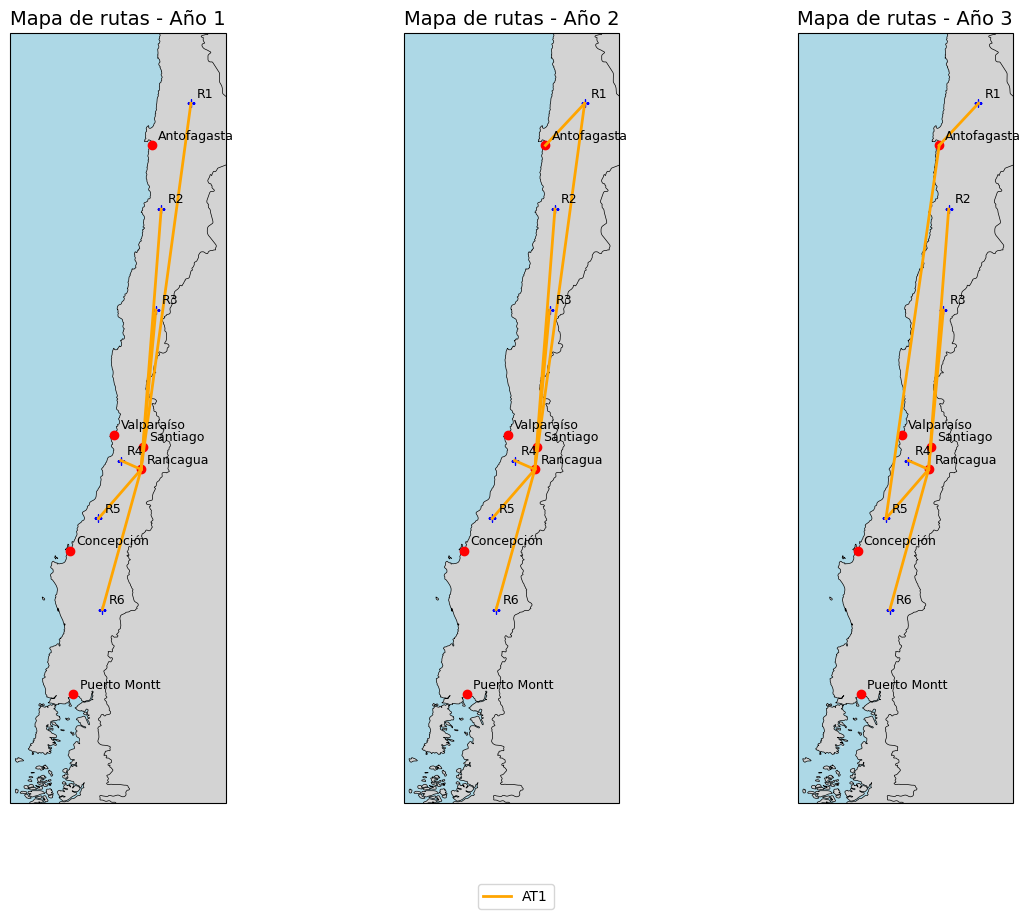

In [ ]:
# Crear figura con 3 subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(
    1, 3, figsize=(15, 10),
    subplot_kw={"projection": ccrs.PlateCarree()},
    gridspec_kw={"wspace": 0.05}   # reduce separación horizontal
)


# Función para graficar los mapas
def graficar_mapa(ax, año, titulo):
    # Ajustar los límites del mapa para Chile
    ax.set_extent([-75, -68, -45, -20], crs=ccrs.PlateCarree())

    # Agregar rasgos
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor="lightgray")
    ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

    # Graficar las ciudades
    for nombre, (lon, lat) in coordenadas_ciudades.items():
        ax.plot(lon, lat, marker="o", color="red", markersize=6, transform=ccrs.PlateCarree())
        ax.text(lon + 0.2, lat + 0.2, nombre, transform=ccrs.PlateCarree(), fontsize=9)

    # Graficar las regiones
    for nombre, (lon, lat) in coordenadas_regiones.items():
        ax.plot(lon, lat, marker="+", color="blue", markersize=6, transform=ccrs.PlateCarree())
        ax.text(lon + 0.2, lat + 0.2, nombre, transform=ccrs.PlateCarree(), fontsize=9)

    # Dibujar rutas
    for c, r, t, a in valores_rutas:
        if a != año:
            continue
        lon_ciu, lat_ciu = coordenadas_ciudades[c]
        lon_reg, lat_reg = coordenadas_regiones[r]
        if y[(c, r, t, año)].varValue > 0:
            ax.plot([lon_ciu, lon_reg], [lat_ciu, lat_reg],
                    color=colores_rutas[t], linewidth=2,
                    transform=ccrs.PlateCarree(), label=t)

    ax.set_title(titulo, fontsize=14)

# Graficar año 1, 2 y 3
graficar_mapa(axes[0], 1, "Mapa de rutas - Año 1")
graficar_mapa(axes[1], 2, "Mapa de rutas - Año 2")
graficar_mapa(axes[2], 3, "Mapa de rutas - Año 3")

# Arreglar leyenda (solo una para toda la figura)
handles, labels = axes[0].get_legend_handles_labels()
for ax in axes[1:]:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc="lower center", ncol=3)

#plt.tight_layout(rect=[0, 0.05, 1, 1])  # deja espacio abajo para la leyenda
plt.show()


# Preguntas


1.   **¿Cuál es la configuración óptima que le remendaría a Funnys Company si se considera la posibilidad de implementar plantas de producción en las ciudades seleccionadas? Es decir, ¿Dónde implementaía las nuevas plantas de producción, de que capacidad deben ser y que servicios de transporte debe utilizar para atender la demanda anual pronosticada para los próximos tres años?**

R: La configuración óptima bajo los supuestos que hemos propuesto es contruir una única planta pequeña en la ciudad de Antofagasta eligiendo solamente como alternativa el transporte 1. Esta decisión permite suplir la demanda y reducir al máximo los costos de la red.

2.   **¿Cómo cambiaría su respuesta si se relaja la restricción de número de instalaciones por habilitar en cada ciudad? Es decir, si ahora se permite instalar más de una planta de producción en cada ciudad.**

R: Al relajar la restricción la configuración óptima sigue siendo la misma. La razón de esto es que Antofagasta es una muy buena ubicación estrategica y la capacidad de producción de dos plantas es suficiente para cubrir la demanda de los proximos 3 años

3.  **Exponga al menos 5 conclusiones de su trabajo indicando como mínimo: la importancia de la localización óptima de las instalaciones en los costos totales de la red de distribución, impacto de los costos de apertura de plantas de producción, los costos de transporte y costos de producción.**

R:

- **Importancia de la localización óptima:** La ubicación adecuada de las plantas permite reducir de manera significativa los costos totales de la red de distribución. Una planta mal situada puede generar pérdidas, aun cuando la región tenga alta demanda, debido al peso de los costos fijos, de apertura y sobre todo al costo asociado a unidad producida cuando hablamos de grandes volúmenes de demanda.
- **Importancia de los costos de apertura de plantas:** Observamos que los costos de abrir y mantener nuevas plantas de producción suele aumentar mucho el costo de la red sobre todo cuando la capacidad de producción de las plantas pequeñas da abasto suficiente para la demanda proyectado de los proximos 3 años. Debido a esto, observamos lo importante que es abrir una planta del tamaño correcto en la ubicación correcta.
- **Rol de los costos de transporte:** El análisis mostró que, en ciertas situaciones, resulta más económico abastecer regiones de alta demanda desde plantas mejor ubicadas en otras zonas, en lugar de construir nuevas instalaciones locales ya que el precio asociado a dsitribuir unidades es mas bajo que el de abrir y mantener una planta de producción nueva.
- **Costos de producción:** En este caso de estudio, los costos de producción por unidad juegan un rol fundamental. En una primera impresión se puede ver que en Santiago existe una gran demanda y los costos de apertura y costos fijos son bastante menores a los de otras regiones, sin embargo el costo de producción de cada unidad de producto en la ciudad de Santiago se encuentra entre los mas altos. Este costo toma gran importancia al considerar que el volumen de producción de las plantas es de millones de unidades.
- **Visión integral de costos:** El estudio permitió comprender que las decisiones de localización deben considerar simultáneamente costos de apertura, transporte y producción. Una evaluación aislada de uno de estos factores puede conducir a decisiones que se alejan de lo óptimo y, sobre todo, no rentables a largo plazo.
